In [1]:
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
import statistics
import seaborn as sns; sns.set(style="whitegrid")
import math
%run Cointegration.py
%matplotlib inline

In [62]:
def coefficients(data, y_symbol, x_symbol, period):
    model = regression(data, y_symbol, x_symbol, period)
    return {"temp":model.params['temp'],
            "angular":model.params[x_symbol],
            "intercept":model.params['const']}

def regression(data, y_symbol, x_symbol, period):
    numbers = np.arange(1, period+1)
    pairs = pd.DataFrame()
    pairs[y_symbol] = data[y_symbol]
    pairs[x_symbol] = data[x_symbol]

    pairs = pairs[len(data)-period:]
    pairs['temp'] = period - numbers + 1
    
    y = pairs[y_symbol]
    x = pairs[[x_symbol, 'temp']]
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    return model

def resid(data, y_symbol, x_symbol, coef):
    res = data[y_symbol]-coef['angular']*data[x_symbol]-tempo*coef['temp']-coef['intercept']
    return res

def linetemp(data, period):
    numbers = np.arange(1, period+1)
    temp = period - numbers + 1
    return temp

In [39]:
data = pd.read_csv('datasets/data.csv', index_col=0)
#data.drop(['30/06/2020'], inplace=True)

In [40]:
#'CYRE3', 'LREN3
y_symbol = 'B3SA3'
x_symbol = 'BPAC11'
period = 250

In [41]:
numbers = np.arange(1, period+1)
tempo = period - numbers + 1
data_limmit = data[len(data)-period:]

data_limmit = data_limmit[[y_symbol, x_symbol]]
data_limmit = data_limmit[::-1]

In [46]:
coef = coefficients(data_limmit, y_symbol, x_symbol, period)
coef

{'temp': 0.013983577471253205,
 'angular': 0.29653880696395707,
 'intercept': 25.302239203209822}

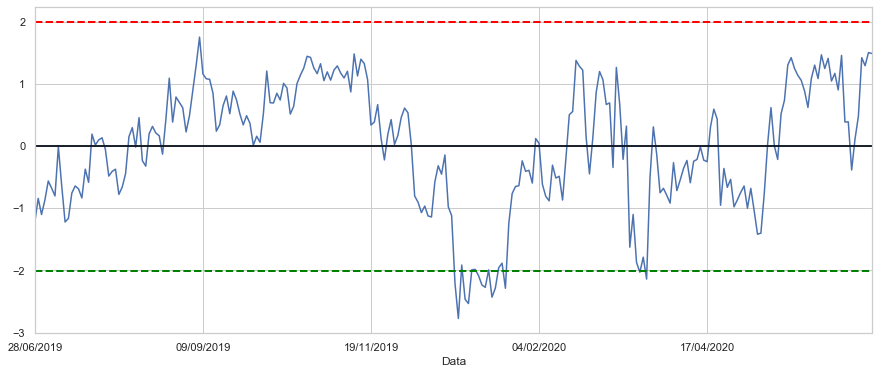

In [56]:
res = resid(data_limmit, y_symbol, x_symbol, coef)
# antes de plotar os dados devem ser invertidos para ordem crescente
res = res[::-1]
ret = zscore(res)
std = statistics.stdev(ret)
ret.plot(figsize=(15,6))
plt.axhline(ret.mean())

plt.axhline(0, color='black',label='mean') # Add the mean of residual
plt.axhline(2*std, color='red', linestyle='--', linewidth=2)
plt.axhline(-2*std, color='green', linestyle='--', linewidth=2)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


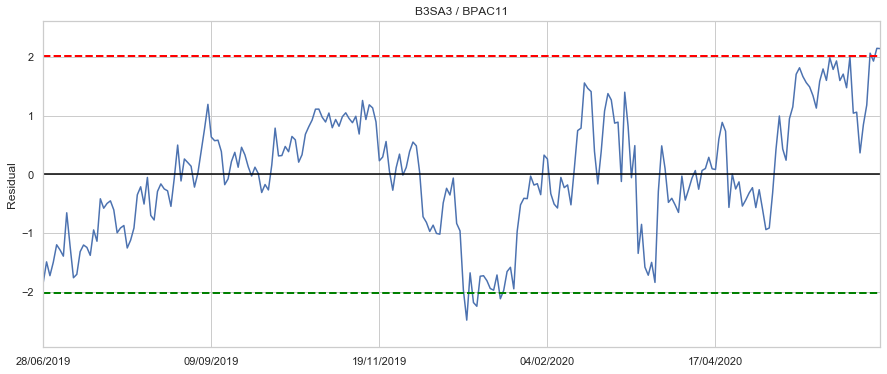

In [57]:
show(data, y_symbol, x_symbol, period)

In [59]:
model = regression(data, y_symbol, x_symbol, period)
model.params

const     28.812117
BPAC11     0.296539
temp      -0.013984
dtype: float64

In [18]:
"""zscore(model.resid)[::-1].plot(figsize=(15,6))"""

'zscore(model.resid)[::-1].plot(figsize=(15,6))'

In [385]:
"""coef_temp = -0.0003
coef_ang = 0.141
coef_linear = 9.97

#data['resid'] = data['BBAS3']-coef_ang*data['CSAN3']-data['Du']*coef_temp-coef_linear
resid = data_limmit[y_symbol]-coef_ang*data_limmit[x_symbol]-data_limmit['Du']*coef_temp-coef_linear
resid = resid[::-1]"""

"coef_temp = -0.0003\ncoef_ang = 0.141\ncoef_linear = 9.97\n\n#data['resid'] = data['BBAS3']-coef_ang*data['CSAN3']-data['Du']*coef_temp-coef_linear\nresid = data_limmit[y_symbol]-coef_ang*data_limmit[x_symbol]-data_limmit['Du']*coef_temp-coef_linear\nresid = resid[::-1]"